In [204]:
import pandas as pd

In [205]:
from sklearn.datasets import load_iris #Load the Iris dataset from sklearn.

In [206]:
iris=load_iris()

In [207]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Preprocessing

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [210]:
df.duplicated().sum() #checking duplicates

1

In [211]:
df=df.drop_duplicates() #remove duplicates

In [212]:
df.duplicated().sum()


0

In [213]:
df.isnull().sum() # checchimg null values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# Finding and removing Outlier

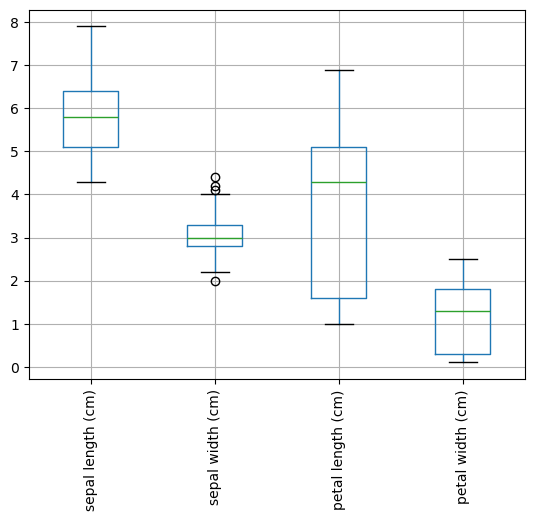

In [215]:
import matplotlib.pyplot as plt
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [216]:
 # removing outlier by using iqr method
q1=df['sepal width (cm)'].quantile(0.25)
q2=df['sepal width (cm)'].quantile(0.75)
iqr=q2-q1
lower=q1-iqr*1.5
upper=q2+iqr*1.5

In [217]:
data1=df[(df['sepal width (cm)']<upper) & (df['sepal width (cm)']>lower)]

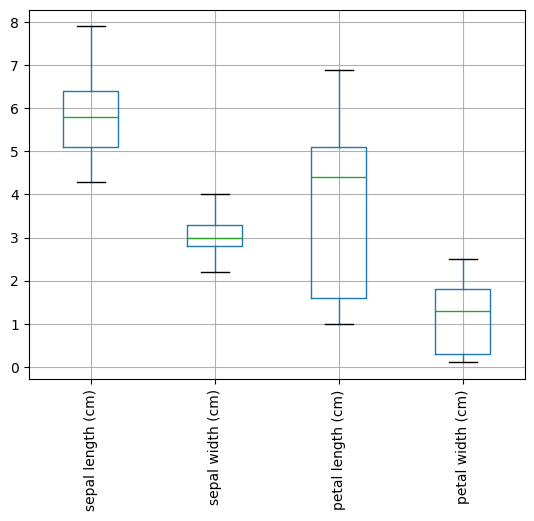

In [218]:
data1.boxplot()
plt.xticks(rotation=90)
plt.show()

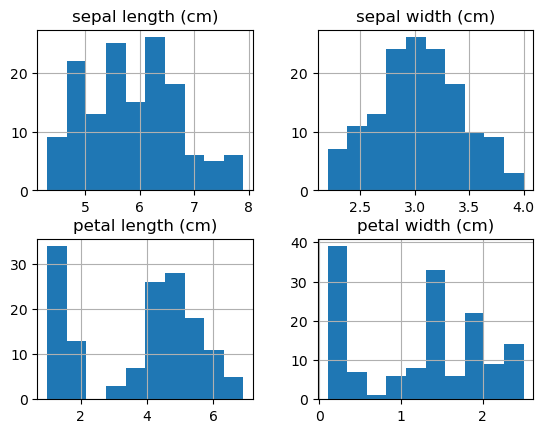

In [219]:
nu=data1.select_dtypes("number")
nu.hist()
plt.show()

# Scaling feature data

In [221]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [222]:
features=data1
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


 # Clustering Algorithm Implementation

# A) KMeans Clustering 

KMeans clustering is an unsupervised machine learning algorithm that partitions the data into K clusters based on the mean distance of the features. The algorithm works as follows:

- Initialize K centroids randomly
- Assign each data point to the closest centroid
- Update the centroids by calculating the mean of all data points assigned to each centroid
Key Concepts:

- Centroids: The centers of the clusters, represented by a set of coordinates.
- Distance metric: A measure of similarity between data points and centroids (e.g., Euclidean distance).
- Cluster assignment: The process of assigning each data point to the closest centroid.

KMeans clustering is an iterative algorithm that refines the cluster assignments and centroids until convergence. The result is a set of clusters that minimize the sum of squared distances between data points and their assigned centroids.


In [226]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,init='k-means++',n_init=15) # Example with 3 clusters
data1['Cluster'] = kmeans.fit_predict(scaled_features)
data1

C:\Users\ANEESH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ANEESH\AppData\Local\Temp\ipykernel_11024\3954219487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Cluster'] = kmeans.fit_predict(scaled_features)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [227]:
cluster_profile = data1.groupby('Cluster').mean()
cluster_profile

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Cluster,,,,
0,6.791111,3.117778,5.508889,1.977778
1,4.976596,3.376596,1.461702,0.246809
2,5.845283,2.683019,4.416981,1.428302


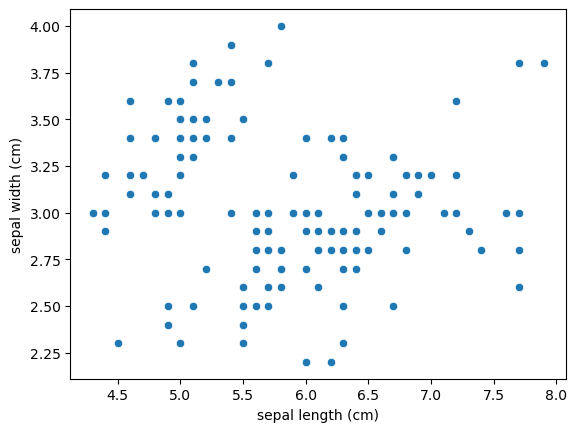

In [228]:

sns.scatterplot(x=data1['sepal length (cm)'], y=data1['sepal width (cm)'])
plt.show()

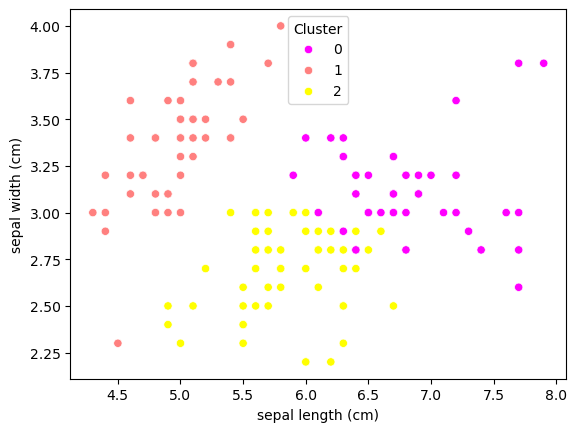

In [229]:
import seaborn as sns
sns.scatterplot(x=data1['sepal length (cm)'], y=data1['sepal width (cm)'],hue=data1["Cluster"],palette="spring")
plt.show()

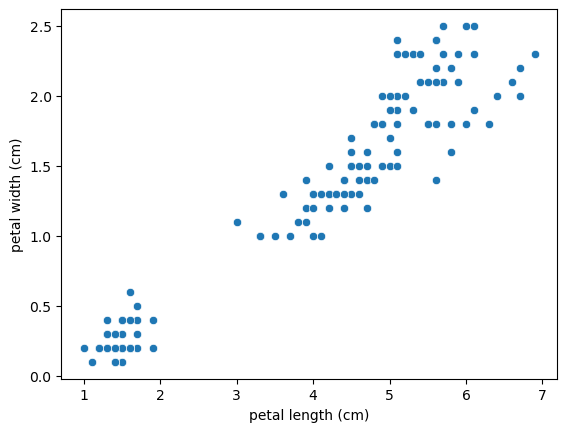

In [230]:
sns.scatterplot(x=data1['petal length (cm)'], y=data1['petal width (cm)'])
plt.show()

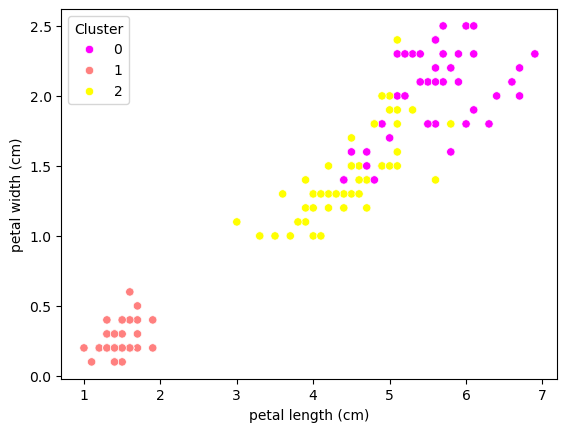

In [231]:
sns.scatterplot(x=data1['petal length (cm)'], y=data1['petal width (cm)'],hue=data1["Cluster"],palette="spring")
plt.show()

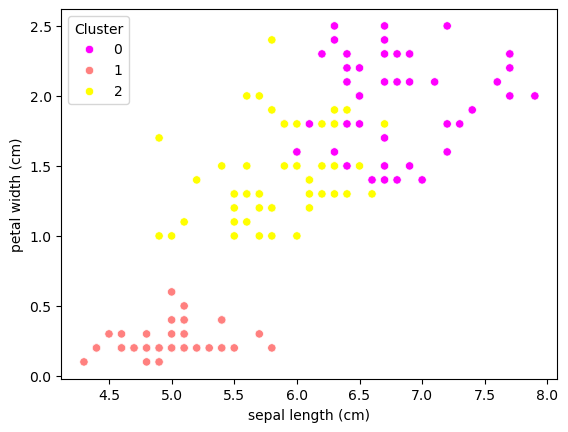

In [232]:
sns.scatterplot(x=data1['sepal length (cm)'], y=data1['petal width (cm)'],hue=data1["Cluster"],palette="spring")
plt.show()

# B)Hierarchical Clustering

Hierarchical clustering is an unsupervised machine learning algorithm that builds a hierarchy of clusters by merging or splitting existing clusters. The algorithm works as follows:

- Start with each data point as a separate cluster
- Calculate the distance between each pair of clusters
- Merge the two closest clusters into a new cluster
- Repeat steps 2-3 until all clusters are merged into a single cluster


In [233]:
from sklearn.cluster import AgglomerativeClustering

In [234]:
ac=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
data1['Cluster_ac'] = ac.fit_predict(scaled_features)
data1

C:\Users\ANEESH\AppData\Local\Temp\ipykernel_11024\1709384545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Cluster_ac'] = ac.fit_predict(scaled_features)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster,Cluster_ac
0,5.1,3.5,1.4,0.2,1,2
1,4.9,3.0,1.4,0.2,1,2
2,4.7,3.2,1.3,0.2,1,2
3,4.6,3.1,1.5,0.2,1,2
4,5.0,3.6,1.4,0.2,1,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1


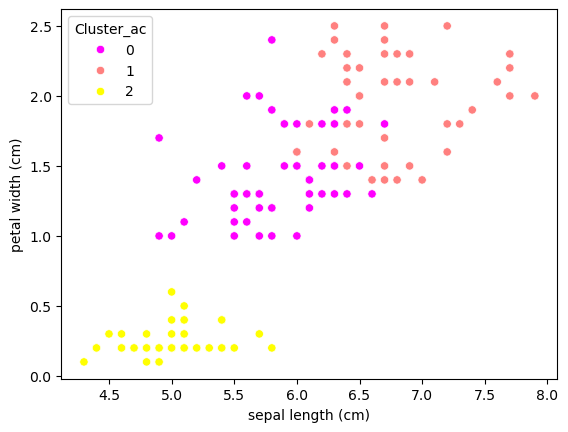

In [235]:
sns.scatterplot(x=data1['sepal length (cm)'], y=data1['petal width (cm)'],hue=data1["Cluster_ac"],palette="spring")
plt.show()

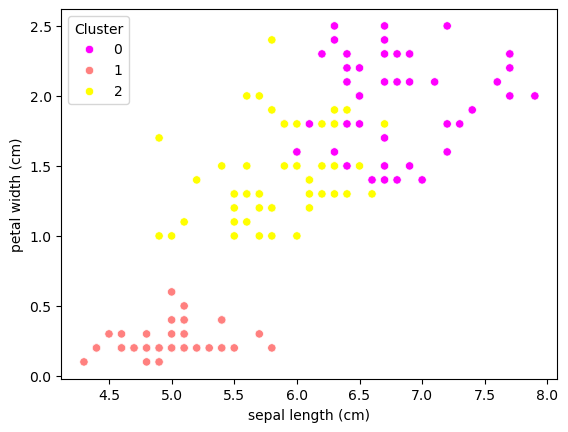

In [236]:
sns.scatterplot(x=data1['sepal length (cm)'], y=data1['petal width (cm)'],hue=data1["Cluster"],palette="spring")
plt.show()

# Evaluation Method

In [238]:
from sklearn.metrics import silhouette_score
# for kmeans Clustering
labels = kmeans.labels_
silhouette_kmean = silhouette_score(scaled_features,labels)
print(silhouette_kmean)
# for Hierarchical Clustering
silhouette_ac = silhouette_score(scaled_features,data1["Cluster_ac"])
print(silhouette_ac)

0.5666233640275375
0.5666233640275375
